# Generate report  - POC

## Read data

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [2]:
# data = pd.read_excel('./data-input/sample_data_01.xlsx', sheet_name=None)
WORKLIST_FILE_PATH = './data/input/230426_GN004240-033_-_worklist-ELISA.xls'
RESULT_FILE_PATH =   './data/input/230426_GN004240-033_-_calc2.xlsx'
data = pd.read_excel(RESULT_FILE_PATH, sheet_name=None)
data["Result_Overview"]

C:\Users\hwn6193\AppData\Roaming\Python\Python39\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Unnamed: 0,Reader Data [cp/ml],Sample Name,Pre-dilution,Result [cp/ml],CV [%],Comment
0,Assay Control,20700000000,Kontrolle,100,2.070000e+12,12.2,NaN
1,Sample 01,6371000000,PPO02_2307HAR_MEG_Z2,100,6.371000e+11,3.8,NaN
2,Sample 02,6874000000,PPO02_2307HAR_MEG_Z3,100,6.874000e+11,9.6,NaN
3,Sample 03,7422000000,PPO02_2307HAR_MEG_Z4,100,7.422000e+11,4.1,NaN
4,Sample 04,12590000000,PPO02_2307HAR_ECV_P,50,6.295000e+11,3.1,NaN
5,Sample 05,26670000000,PPO02_2307_UFA_UF1_R,500,1.333500e+13,5.9,NaN
6,Sample 06,12020000000,PPO02_2307_UFA_Pool,1000,1.202000e+13,7.2,NaN
7,Sample 07,66850000000,PPO02_2307_UCE_P,500,3.342500e+13,6.6,NaN
8,Sample 08,6304000000,PPO02_2307FMB_T03,10,6.304000e+10,10.6,NaN
9,Sample 09,13250000000,PPO02_2307_UFA_Conc,1000,1.325000e+13,6.8,NaN


In [3]:
data["Data"]

,##BLOCKS= 24,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Plate:,Plate01,1.3,PlateFormat,Endpoint,Absorbance,Raw,FALSE,1.0000,NaN,...,12.0000,96.0000,1.0000,8.0000,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Temperature(¡C),1,2,3,4,5,6,7.0000,8.0000,...,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,10.0000,11.0000,12.0000
2,NaN,26.8,1.4173,1.0025,0.5957,0.3434,1.4833,0.8592,0.4956,0.3078,...,0.0382,0.0378,0.0394,0.0385,0.0377,0.0376,0.0373,0.0376,0.0365,0.0359
3,NaN,NaN,0.6744,0.3738,0.2386,0.1494,0.7202,0.3783,0.2339,0.1390,...,0.0368,0.0362,0.0377,0.0362,0.0369,0.0378,0.0422,0.0419,0.0401,0.0386
4,NaN,NaN,0.6881,0.3836,0.2427,0.1696,1.148,0.6705,0.3803,0.2581,...,0.0372,0.0361,0.0379,0.0375,0.0376,0.0367,0.0425,0.0445,0.0433,0.0391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Group Summaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,MeanResult_21,NaN,4972000000,Average(Dil.Result),4 significant figures,Scientific Notation,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,CV_21 [%],NaN,7.8,Cv(Dil.Result),1 decimal places,Numeric Notation,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450,~End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = data["Data"]
df_450 = df.iloc[2:10, 2:14].copy().reset_index(drop=True)
df_450.columns = range(df_450.columns.size)
df_450

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.4173,1.0025,0.5957,0.3434,1.4833,0.8592,0.4956,0.3078,0.1886,0.1174,0.0862,0.0464
1,0.6744,0.3738,0.2386,0.1494,0.7202,0.3783,0.2339,0.1390,3.0011,2.4716,2.0474,1.4248
2,0.6881,0.3836,0.2427,0.1696,1.148,0.6705,0.3803,0.2581,3.0725,2.6435,2.3408,1.7180
3,0.7448,0.4405,0.2692,0.1587,1.0765,0.7337,0.4131,0.2505,2.8067,2.4498,2.0751,1.6788
4,1.0996,0.6447,0.3814,0.2413,2.3161,1.6267,1.2390,0.8018,3.1924,2.7574,2.2437,1.6209
5,1.6459,1.12,0.676,0.4203,0.8883,0.4625,0.2925,0.1736,2.7867,2.8694,2.2335,1.6908
6,1.0612,0.5948,0.3667,0.2419,3.4027,3.2504,2.8049,2.4374,3.1459,2.8276,2.1781,1.7567
7,2.3107,1.5667,1.3492,0.8404,2.9575,2.5241,2.1556,1.5844,0.5688,0.3374,0.1963,0.1209


In [5]:
df_630 = df.iloc[2:10, 15:28].copy().reset_index(drop=True)
df_630.columns = range(df_630.columns.size)
df_630

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0399,0.0389,0.0382,0.0378,0.0394,0.0385,0.0377,0.0376,0.0373,0.0376,0.0365,0.0359
1,0.0384,0.0384,0.0368,0.0362,0.0377,0.0362,0.0369,0.0378,0.0422,0.0419,0.0401,0.0386
2,0.0367,0.0373,0.0372,0.0361,0.0379,0.0375,0.0376,0.0367,0.0425,0.0445,0.0433,0.0391
3,0.0379,0.0378,0.0375,0.0370,0.0384,0.0387,0.0375,0.0372,0.0417,0.0407,0.0411,0.0376
4,0.0386,0.0379,0.0375,0.0368,0.0443,0.0393,0.0385,0.0383,0.0464,0.0412,0.0409,0.0390
5,0.0399,0.0389,0.0378,0.0378,0.0377,0.0383,0.0366,0.0364,0.0439,0.0424,0.0406,0.0394
6,0.0383,0.0372,0.0368,0.0365,0.0445,0.0430,0.0431,0.0407,0.0419,0.0415,0.0407,0.0397
7,0.0422,0.0399,0.0397,0.0388,0.0414,0.0415,0.0409,0.0397,0.0378,0.0364,0.0375,0.0360


In [6]:
def get_data_crop(df, row_span, col_span):
  crop = df.iloc[row_span, col_span].copy()
  crop.reset_index(drop=True, inplace=True)
  crop.set_index([['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']], inplace=True)
  crop.columns = range(1, crop.columns.size+1)
  return crop

def read_data_xls(file_path):
  data = pd.read_excel(file_path, sheet_name=None)
  df_450 = get_data_crop(data["Data"], range(2, 10), range(2, 14))
  df_630 = get_data_crop(data["Data"], range(2, 10), range(15, 27))

  return df_450, df_630


df_450, df_630 = read_data_xls('./data/sample_data_01.xlsx')

In [7]:
df_450

,1,2,3,4,5,6,7,8,9,10,11,12
A,3.0779,1.9868,1.1839,0.6691,3.2007,2.0784,1.2342,0.7316,0.4052,0.2400,0.1475,0.0456
B,2.4998,1.4888,0.8877,0.5114,0.6643,0.3457,0.2053,0.1338,0.0477,0.0479,0.0489,0.0481
C,1.8331,1.0177,0.5893,0.3472,1.0053,0.5386,0.3165,0.1940,0.0470,0.0477,0.0486,0.0495
D,1.138,0.624,0.3576,0.2104,1.5498,0.8461,0.5100,0.2856,0.0477,0.0478,0.0470,0.0466
E,0.136,0.0856,0.0669,0.0568,0.9792,0.5398,0.3057,0.1835,0.0461,0.0464,0.0467,0.0450
F,0.9342,0.4709,0.2822,0.1748,0.0636,0.0541,0.0511,0.0497,0.0476,0.0481,0.0477,0.0489
G,0.7552,0.4226,0.2374,0.1495,0.0467,0.0448,0.0457,0.0462,0.0471,0.0472,0.0476,0.0487
H,0.7873,0.4146,0.2582,0.1554,0.0481,0.0471,0.0465,0.0462,0.0464,0.0459,0.0474,0.0483


In [8]:
df_630

,1,2,3,4,5,6,7,8,9,10,11,12
A,0.0417,0.0403,0.0394,0.0381,0.0427,0.0406,0.0396,0.0377,0.0368,0.0373,0.0379,0.0369
B,0.0408,0.0399,0.0388,0.0382,0.0382,0.0377,0.0376,0.0369,0.0372,0.0373,0.0373,0.0374
C,0.0381,0.0386,0.0380,0.0376,0.0385,0.0374,0.0376,0.0373,0.0371,0.0370,0.0374,0.0355
D,0.0374,0.0382,0.0375,0.0378,0.0401,0.0386,0.0382,0.0376,0.0379,0.0378,0.0378,0.0354
E,0.0348,0.0356,0.0364,0.0371,0.0380,0.0371,0.0371,0.0370,0.0374,0.0370,0.0365,0.0341
F,0.0383,0.0368,0.0373,0.0375,0.0368,0.0359,0.0357,0.0365,0.0380,0.0375,0.0369,0.0357
G,0.0381,0.0374,0.0373,0.0370,0.0340,0.0339,0.0341,0.0352,0.0366,0.0356,0.0354,0.0360
H,0.0388,0.0388,0.0364,0.0382,0.0374,0.0364,0.0360,0.0371,0.0384,0.0378,0.0380,0.0368


In [9]:
df_delta = df_450 - df_630
df_delta

,1,2,3,4,5,6,7,8,9,10,11,12
A,3.0362,1.9465,1.1445,0.631,3.158,2.0378,1.1946,0.6939,0.3684,0.2027,0.1096,0.0087
B,2.459,1.4489,0.8489,0.4732,0.6261,0.308,0.1677,0.0969,0.0105,0.0106,0.0116,0.0107
C,1.795,0.9791,0.5513,0.3096,0.9668,0.5012,0.2789,0.1567,0.0099,0.0107,0.0112,0.0140
D,1.1006,0.5858,0.3201,0.1726,1.5097,0.8075,0.4718,0.2480,0.0098,0.0100,0.0092,0.0112
E,0.1012,0.05,0.0305,0.0197,0.9412,0.5027,0.2686,0.1465,0.0087,0.0094,0.0102,0.0109
F,0.8959,0.4341,0.2449,0.1373,0.0268,0.0182,0.0154,0.0132,0.0096,0.0106,0.0108,0.0132
G,0.7171,0.3852,0.2001,0.1125,0.0127,0.0109,0.0116,0.0110,0.0105,0.0116,0.0122,0.0127
H,0.7485,0.3758,0.2218,0.1172,0.0107,0.0107,0.0105,0.0091,0.0080,0.0081,0.0094,0.0115


In [10]:
def to_multi_index(df_single_index, name):
  df_multi_idx = df_single_index.stack().to_frame()
  df_multi_idx.columns = [name]

  return df_multi_idx


In [11]:
# df_delta_all = df_delta.stack().to_frame()
# df_delta_all.columns = ["OD_delta"]

# df_450_all = df_450.stack().to_frame()
# df_450_all.columns = ["OD_450"]

# df_630_all = df_630.stack().to_frame()
# df_630_all.columns = ["OD_630"]

# m = pd.merge(df_delta_all, pd.merge(df_450_all, df_630_all, left_index=True, right_index=True), left_index=True, right_index=True)

In [12]:
data_file_path = './data/sample_data_01.xlsx'

def read_concat_data(data_file_path):
  df_450, df_630 = read_data_xls(data_file_path)
  df_delta = df_450 - df_630
  df_delta_all = to_multi_index(df_delta, "OD_delta")
  df_450_all = to_multi_index(df_450, "OD_450")
  df_630_all = to_multi_index(df_630, "OD_630")

  return pd.merge(df_delta_all, 
                  pd.merge(df_450_all, df_630_all, 
                  left_index=True, right_index=True),
                  left_index=True, right_index=True)

In [13]:
m = read_concat_data(data_file_path)
m

OD_delta  OD_450  OD_630
A 1    3.0362  3.0779  0.0417
  2    1.9465  1.9868  0.0403
  3    1.1445  1.1839  0.0394
  4     0.631  0.6691  0.0381
  5     3.158  3.2007  0.0427
...       ...     ...     ...
H 8    0.0091  0.0462  0.0371
  9     0.008  0.0464  0.0384
  10   0.0081  0.0459  0.0378
  11   0.0094  0.0474   0.038
  12   0.0115  0.0483  0.0368

[96 rows x 3 columns]

### Layouts

First read layouts as arrays and re-arage to dataframe, using plate layout indexing.

In [14]:
def to_matrix(l, n):
  return [l[i:i+n] for i in range(0, len(l), n)]

def index_plate_layout(plate_layout):
  plate_layout.set_index([['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']], inplace=True)
  plate_layout.columns = range(1, plate_layout.columns.size + 1)

  return plate_layout

def to_plate_layout(lst):
  l_2d = to_matrix(lst, 8)
  plate_layout = pd.DataFrame(l_2d).T
  
  return index_plate_layout(plate_layout)

In [15]:
import data.layouts as layouts
to_plate_layout(layouts.l_plate_layout)

,1,2,3,4,5,6,7,8,9,10,11,12
A,k_1,k_2,k_3,k_4,r1_1,r2_1,r3_1,r4_1,r5_1,r6_1,r7_1,b
B,s1_1,s1_2,s1_3,s1_4,s8_1,s8_2,s8_3,s8_4,s15_1,s15_2,s15_3,s15_4
C,s2_1,s2_2,s2_3,s2_4,s9_1,s9_2,s9_3,s9_4,s16_1,s16_2,s16_3,s16_4
D,s3_1,s3_2,s3_3,s3_4,s10_1,s10_2,s10_3,s10_4,s17_1,s17_2,s17_3,s17_4
E,s4_1,s4_2,s4_3,s4_4,s11_1,s11_2,s11_3,s11_4,s18_1,s18_2,s18_3,s18_4
F,s5_1,s5_2,s5_3,s5_4,s12_1,s12_2,s12_3,s12_4,s19_1,s19_2,s19_3,s19_4
G,s6_1,s6_2,s6_3,s6_4,s13_1,s13_2,s13_3,s13_4,s20_1,s20_2,s20_3,s20_4
H,s7_1,s7_2,s7_3,s7_4,s14_1,s14_2,s14_3,s14_4,s21_1,s21_2,s21_3,s21_4


Save layouts to CSV, so that ib the future a layout could be defined in i.e. Excel.

In [16]:
def save_plate_layout_csv(layout_list, out_file):
  l = to_plate_layout(layout_list)
  l.to_csv(out_file, index=False)

SAVE_LAYOUTS_CSV = True
if SAVE_LAYOUTS_CSV:
  save_plate_layout_csv(layouts.l_plate_layout, './data/plate_layout.csv')
  save_plate_layout_csv(layouts.l_plate_layout_ident, './data/plate_layout_ident.csv')
  save_plate_layout_csv(layouts.l_plate_layout_num, './data/plate_layout_num.csv')
  save_plate_layout_csv(layouts.l_plate_layout_dil_id, './data/plate_layout_dil_id.csv')


Read CSV layout for check

In [17]:
def read_plate_layout(file_path):
  plate_layout = pd.read_csv(file_path)
  index_plate_layout(plate_layout)

  return plate_layout

plate_layout = read_plate_layout('./data/plate_layout.csv')
plate_layout_id = read_plate_layout('./data/plate_layout_ident.csv')
plate_layout_num = read_plate_layout('./data/plate_layout_num.csv')
plate_layout_dil_id = read_plate_layout('./data/plate_layout_dil_id.csv')

In [18]:
display(plate_layout_id)
display(plate_layout_num)
display(plate_layout_dil_id)

,1,2,3,4,5,6,7,8,9,10,11,12
A,k,k,k,k,r,r,r,r,r,r,r,b
B,s,s,s,s,s,s,s,s,s,s,s,s
C,s,s,s,s,s,s,s,s,s,s,s,s
D,s,s,s,s,s,s,s,s,s,s,s,s
E,s,s,s,s,s,s,s,s,s,s,s,s
F,s,s,s,s,s,s,s,s,s,s,s,s
G,s,s,s,s,s,s,s,s,s,s,s,s
H,s,s,s,s,s,s,s,s,s,s,s,s


,1,2,3,4,5,6,7,8,9,10,11,12
A,1,1,1,1,1,1,1,1,1,1,1,0
B,1,1,1,1,8,8,8,8,15,15,15,15
C,2,2,2,2,9,9,9,9,16,16,16,16
D,3,3,3,3,10,10,10,10,17,17,17,17
E,4,4,4,4,11,11,11,11,18,18,18,18
F,5,5,5,5,12,12,12,12,19,19,19,19
G,6,6,6,6,13,13,13,13,20,20,20,20
H,7,7,7,7,14,14,14,14,21,21,21,21


,1,2,3,4,5,6,7,8,9,10,11,12
A,1,2,3,4,1,2,3,4,5,6,7,0
B,1,2,3,4,1,2,3,4,1,2,3,4
C,1,2,3,4,1,2,3,4,1,2,3,4
D,1,2,3,4,1,2,3,4,1,2,3,4
E,1,2,3,4,1,2,3,4,1,2,3,4
F,1,2,3,4,1,2,3,4,1,2,3,4
G,1,2,3,4,1,2,3,4,1,2,3,4
H,1,2,3,4,1,2,3,4,1,2,3,4


### Combine read data from XLSX with layouts

In [19]:
def concat_data_and_layout(df_data, df_layout):
  return pd.merge(df_data, df_layout,
                  left_index=True, right_index=True)

# df_all = concat_data_and_layout(m, to_multi_index(plate_layout, 'plate_layout'))
df_all = concat_data_and_layout(m, to_multi_index(plate_layout_id, 'plate_layout_ident'))
df_all = concat_data_and_layout(df_all, to_multi_index(plate_layout_num, 'plate_layout_num'))
df_all = concat_data_and_layout(df_all, to_multi_index(plate_layout_dil_id, 'plate_layout_dil_id'))
display(df_all)

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 1    3.0362  3.0779  0.0417                  k                 1  \
  2    1.9465  1.9868  0.0403                  k                 1   
  3    1.1445  1.1839  0.0394                  k                 1   
  4     0.631  0.6691  0.0381                  k                 1   
  5     3.158  3.2007  0.0427                  r                 1   
...       ...     ...     ...                ...               ...   
H 8    0.0091  0.0462  0.0371                  s                14   
  9     0.008  0.0464  0.0384                  s                21   
  10   0.0081  0.0459  0.0378                  s                21   
  11   0.0094  0.0474   0.038                  s                21   
  12   0.0115  0.0483  0.0368                  s                21   

      plate_layout_dil_id  
A 1                     1  
  2                     2  
  3                     3  
  4                     4  
  5                     1  
...                   ...  
H 8                     4  
  9                     1  
  10                    2  
  11                    3  
  12                    4  

[96 rows x 6 columns]

Filter data

In [20]:
display(df_all.loc[(df_all['plate_layout_ident']=='r')])

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 5     3.158  3.2007  0.0427                  r                 1  \
  6    2.0378  2.0784  0.0406                  r                 1   
  7    1.1946  1.2342  0.0396                  r                 1   
  8    0.6939  0.7316  0.0377                  r                 1   
  9    0.3684  0.4052  0.0368                  r                 1   
  10   0.2027    0.24  0.0373                  r                 1   
  11   0.1096  0.1475  0.0379                  r                 1   

      plate_layout_dil_id  
A 5                     1  
  6                     2  
  7                     3  
  8                     4  
  9                     5  
  10                    6  
  11                    7

In [21]:
def get_sample(dfa, type, sample_num):
    # TODO: check for valid `type` `and sample_num`
    dfa = dfa.loc[(dfa['plate_layout_ident']==type) & (dfa['plate_layout_num']==sample_num)]
    return dfa

# type ['k', 'b', 's']
# sample_num [1:21, 'b']
display(get_sample(df_all, 's', 1))

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
B 1    2.459  2.4998  0.0408                  s                 1  \
  2   1.4489  1.4888  0.0399                  s                 1   
  3   0.8489  0.8877  0.0388                  s                 1   
  4   0.4732  0.5114  0.0382                  s                 1   

     plate_layout_dil_id  
B 1                    1  
  2                    2  
  3                    3  
  4                    4

### Dilution to Concentration

Define dilution dataframe. The dataframe is indexed according plate layout, index of refference dataframe corresponds to refference of the `plate_layout_dil`.

In [22]:
# TODO: read reference value from parameters
REF_VAL_MAX = 2.090e+10
DILUTIONS = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]

def make_concentration(ref_val_max, dilution):
    conc  = pd.DataFrame({'dilution': dilution})
    conc.loc[:, ['concentration']] = conc.apply(lambda x: ref_val_max / x['dilution'], axis=1)
    conc.index = range(1, len(dilution) + 1)
    return conc

reference_conc = make_concentration(REF_VAL_MAX, DILUTIONS)
display(reference_conc)

,dilution,concentration
1,1.0,2.090000e+10
2,2.0,1.045000e+10
3,4.0,5.225000e+09
4,8.0,2.612500e+09
5,16.0,1.306250e+09
6,32.0,6.531250e+08
7,64.0,3.265625e+08


Check the `reference_set_conc` indexing

In [23]:
print(reference_conc.loc[1])
print(reference_conc.loc[7])

dilution         1.000000e+00
concentration    2.090000e+10
Name: 1, dtype: float64
dilution                64.0
concentration    326562500.0
Name: 7, dtype: float64


## Fit

In [28]:
import fitdata
import matplotlib.pyplot as plt

### Get the fitting data from dataframe

In [29]:
ref = df_all.loc[(df_all['plate_layout_ident']=='r')].copy()
ref['plate_layout_dil'] = ref['plate_layout_dil_id'].map(reference_conc['concentration'])
display(ref)

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 5     3.158  3.2007  0.0427                  r                 1  \
  6    2.0378  2.0784  0.0406                  r                 1   
  7    1.1946  1.2342  0.0396                  r                 1   
  8    0.6939  0.7316  0.0377                  r                 1   
  9    0.3684  0.4052  0.0368                  r                 1   
  10   0.2027    0.24  0.0373                  r                 1   
  11   0.1096  0.1475  0.0379                  r                 1   

      plate_layout_dil_id  plate_layout_dil  
A 5                     1      2.090000e+10  
  6                     2      1.045000e+10  
  7                     3      5.225000e+09  
  8                     4      2.612500e+09  
  9                     5      1.306250e+09  
  10                    6      6.531250e+08  
  11                    7      3.265625e+08

### Fit with confidence interval

In [261]:
tmp = ref.reset_index(level=[0,1])
tmp1 = tmp.iloc[1]
tmp1

level_0                            A
level_1                            6
OD_delta                      2.0378
OD_450                        2.0784
OD_630                        0.0406
plate_layout_ident                 r
plate_layout_num                   1
plate_layout_dil_id                2
plate_layout_dil       10450000000.0
Name: 1, dtype: object

parameter [7.88768623e-03 9.41941858e-01 3.28000461e+10 7.97675039e+00]
chisq=5.896e+09; error=[1.88997075e-02 3.85487142e-02 5.89602516e+09 7.66813387e-01]
function calls 133
a: 0.00789 [-0.0523, 0.068]; err=0.0601[762.55%]
b: 0.942 [0.819, 1.06]; err=0.123[13.02%]
c: 3.28e+10 [1.4e+10, 5.16e+10]; err=1.88e+10[57.21%]
d: 7.98 [5.54, 10.4]; err=2.44[30.59%]
student-t is used for error estimation using 3 degrees of freedom


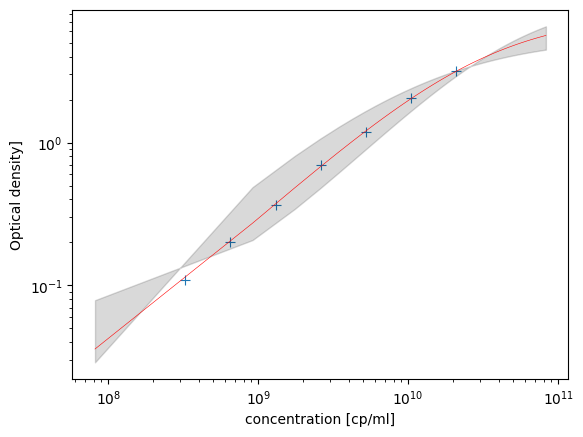

In [279]:
# from scipy.stats.distributions import  t
from scipy.stats import distributions

x = ref.reset_index(level=[0,1])['plate_layout_dil']
y = ref.reset_index(level=[0,1])['OD_delta']

popt, pcov, infodict, mesg, ier = fitdata.fit_reference(fitdata.func, x, y)

CONFIDENCE_INTERVAL = 95.0 # 95% confidence interval = 100*(1-alpha)

def fit_image(x, y, popt, pcov, file_path, confidence_interval=CONFIDENCE_INTERVAL,
    confidence=None, interval_ratio=4.0, rm_index=[]):
    r"""Plot the fitted function with confidence intervals.

    Confidence intervals coud be set using `confidence` parameter.
    'student-t' method is a correct one producing wider confidence intervals.

    Parameters
    ----------
    x : array_like
        x-axis values.
    y : array_like
        y-axis value.
    popt : iterable
        Fit parameters.
    pcov : 
        Covariance matrix from fitting algorithm.
    file_path : string
        Path where the graph image is saved or `None`
    confidence_interval : float 
        Confidence interval in %
    interval_ratio: float
        Ration of min and max extention of x axis for fitted curve plot.
    rm_index: list
        Index of a removed point.
    """

    # confidence [None, 'student-t', 'sqrt_err'] 
    print('parameter', popt)
    perr = np.sqrt(np.diag(pcov))
    sigma_err = 1.0
    chisq = np.sum((perr / sigma_err) ** 2)
    print('chisq={0:.4}; error={1}'.format(np.sqrt(chisq), perr))
    print('function calls', infodict['nfev'])

    plt.scatter(x.drop(rm_index, axis=0), y.drop(rm_index, axis=0), marker='+', s=48, linewidths=0.8, label='data')
    plt.scatter(x.iloc[rm_index], y.iloc[rm_index], marker='.', s=48, linewidths=0.8, label='data')
    plt.xscale('log')
    plt.yscale('log')
    
    alpha = (100.0 - confidence_interval) / 100.0 
    n = len(y)    # number of data points
    p = len(popt) # number of parameters
    dof = max(0, n - p) # number of degrees of freedom

    # student-t value for the dof and confidence level
    tval = distributions.t.ppf(1.0 - alpha / 2., dof) 
    sigma_popt = np.empty(len(popt), dtype=np.float64)
    param_names = ['a', 'b', 'c', 'd']
    for i, p, var, pname in zip(range(n), popt, np.diag(pcov), param_names):
        sigma = var ** 0.5
        st = sigma * tval
        sigma_popt[i] = st
        print('{0}: {1:.3} [{2:.3}, {3:.3}]; err={4:.3}[{5:.2f}%]'.format(pname, p, p - st, p + st, st, 100*st/p))

    if confidence=='None' or confidence=='student-t':
        print('student-t is used for error estimation using {} degrees of freedom'.format(dof))
        popt_high = popt + sigma_popt
        popt_low = popt - sigma_popt
    else:
        print('sqrt of covariance matrix diagonal is used for error estimation')
        popt_high = popt + perr
        popt_low = popt - perr

    num_pts = 100
    x_min = x.min() / interval_ratio
    x_max = x.max() * interval_ratio
    t = np.arange(x_min, x_max, (x_max - x_min) / num_pts)
    plt.plot(t, fitdata.func(t, *popt), 'r-',
                label='fit: a=%f, b=%f, c=%f, d=%f' % tuple(popt),
                linewidth=0.4)
    plt.xlabel('concentration [cp/ml]')
    plt.ylabel('Optical density]')


    bound_upper = fitdata.func(t, *popt_high)
    bound_lower = fitdata.func(t, *popt_low)
    # plotting the confidence intervals
    plt.fill_between(t, bound_lower, bound_upper,
                    color = 'black', alpha = 0.15)
    if file_path != None:
         plt.savefig(file_path)
    plt.show()

fit_image(x, y, popt, pcov, "./result/fit.png", confidence='student-t', rm_index=[])

In [82]:
def fit_sheet(popt, pcov, confidence_interval=95.0):
    # `confidence_interval` 95% confidence interval = 100*(1-alpha)
    alpha = (100.0 - confidence_interval) / 100.0 
    n = len(y)    # number of data points
    p = len(popt) # number of parameters
    dof = max(0, n - p) # number of degrees of freedom

    # student-t value for the dof and confidence level
    tval = distributions.t.ppf(1.0 - alpha / 2.0, dof) 

    sigma_popt = np.empty(len(popt), dtype=np.float64)
    confidence_interval = [None] * 4
    for i, p, var in zip(range(n), popt, np.diag(pcov)):
        sigma = var ** 0.5
        st = sigma * tval
        sigma_popt[i] = st
        confidence_interval[i] = '[{0:.3}, {1:.3}]'.format(p - st, p + st)

    param_names = ['a', 'b', 'c', 'd']
    perr = np.sqrt(np.diag(pcov))

    return pd.DataFrame({'Parameter name': param_names, 'Estimated value':popt,
        'Error': perr, 'Confidence interval': confidence_interval})

display(fit_sheet(popt, pcov))

,Parameter name,Estimated value,Error,Confidence interval
0,a,7.887686e-03,1.889971e-02,"[-0.0523, 0.068]"
1,b,9.419419e-01,3.854871e-02,"[0.819, 1.06]"
2,c,3.280005e+10,5.896025e+09,"[1.4e+10, 5.16e+10]"
3,d,7.976750e+00,7.668134e-01,"[5.54, 10.4]"


Backfit

In [137]:
def backfit(df, param):
    bf = df[['OD_delta', 'plate_layout_dil']].copy()
    bf = bf.reindex(['plate_layout_dil', 'OD_delta'], axis=1)
    bf.rename(columns={'plate_layout_dil': 'Standard Value [cp/ml]', 'OD_delta': 'Optical density'}, inplace=True)
    bf.loc[:, ['Concentration backfit [cp/ml]']] = bf.apply(lambda x: fitdata.inv_func(x['Optical density'], *param), axis=1)
    bf.index.name = 'Well'
    bf = bf.reindex(['Standard Value [cp/ml]', 'Concentration backfit [cp/ml]', 'Optical density'], axis=1)
    return bf

In [45]:
bf = backfit(ref, popt)
display(bf)

Standard Value [cp/ml]  Concentration backfit [cp/ml] Optical density
A 5             2.090000e+10                   2.088755e+10           3.158
  6             1.045000e+10                   1.049313e+10          2.0378
  7             5.225000e+09                   5.154567e+09          1.1946
  8             2.612500e+09                   2.670962e+09          0.6939
  9             1.306250e+09                   1.287877e+09          0.3684
  10            6.531250e+08                   6.548794e+08          0.2027
  11            3.265625e+08                   3.243644e+08          0.1096

In [84]:
r_squared = r2_score(bf['Standard Value [cp/ml]'], bf['Concentration backfit [cp/ml]'])
print('!!! R-squared is invalid for nonlinear models!\n R_squared = {}'.format(r_squared))

!!! R-squared is invalid for nonlinear models!
 R_squared = 0.9999681001319264


In [136]:
display(xc.drop([1]))
xc

0    1.800000e+10
2    4.490000e+09
4    1.122000e+09
5    5.611000e+08
6    2.805000e+08
Name: plate_layout_dil, dtype: float64

0    1.800000e+10
1    8.980000e+09
2    4.490000e+09
4    1.122000e+09
5    5.611000e+08
6    2.805000e+08
Name: plate_layout_dil, dtype: float64

Backfit data from csv

,plate_layout_dil,OD_delta
0,1.800000e+10,1.4609
1,8.980000e+09,0.7627
2,4.490000e+09,0.4562
3,2.244000e+09,0.2956
4,1.122000e+09,0.1530
5,5.611000e+08,0.0824
6,2.805000e+08,0.0465


parameter [2.41354618e-02 8.73606165e-01 9.45085295e+13 2.53472228e+03]
chisq=7.557e+16; error=[3.47947571e-02 2.38230551e-01 7.55744164e+16 1.76485162e+06]
function calls 133
a: 0.0241 [-0.0866, 0.135]; err=0.111[458.80%]
b: 0.874 [0.115, 1.63]; err=0.758[86.78%]
c: 9.45e+13 [-2.4e+17, 2.41e+17]; err=2.41e+17[254486.58%]
d: 2.53e+03 [-5.61e+06, 5.62e+06]; err=5.62e+06[221584.26%]
sqrt of covariance matrix diagonal is used for error estimation


c:\work\report-gen\fitdata.py:8: RuntimeWarning: invalid value encountered in power
  return d + ((a - d) / (1.0 + (x / c) ** b))


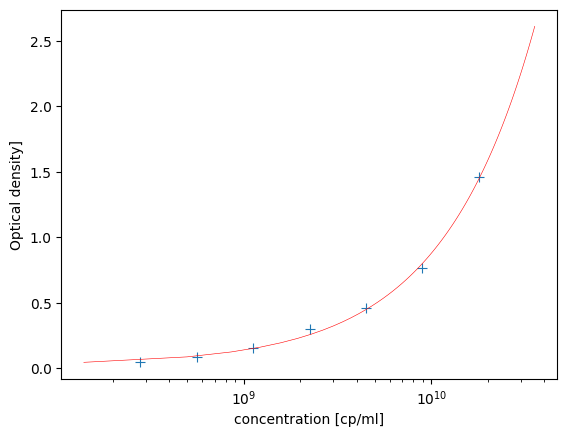

!!! R-squared is invalid for nonlinear models!
R_squared = 0.9979183638705634


In [182]:
fit_data_path = './data/fit_1.csv'
df_csv = pd.read_csv(fit_data_path)
df_csv.drop([], axis=0, inplace=True)
df_csv.rename(columns={'Conc': 'plate_layout_dil', 'OD': 'OD_delta'}, inplace=True)
display(df_csv)
xc = df_csv['plate_layout_dil']
yc = df_csv['OD_delta']
fc = fitdata.fit_reference(fitdata.func, xc, yc)
fit_image(xc, yc, fc[0], fc[1], None, confidence_interval=95, confidence='sqrt_err', interval_ratio=2.0)

bfc = backfit(df_csv, fc[0])
r_squared = r2_score(bfc['Standard Value [cp/ml]'], bfc['Concentration backfit [cp/ml]'])
print('!!! R-squared is invalid for nonlinear models!\nR_squared = {}'.format(r_squared))

R_squared = 0.99792 for index=-1  (R-squared is invalid for nonlinear models!)
0 Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
R_squared = 0.9995 for index=1  (R-squared is invalid for nonlinear models!)
R_squared = 0.9980 for index=2  (R-squared is invalid for nonlinear models!)
R_squared = 0.9991 for index=3  (R-squared is invalid for nonlinear models!)
R_squared = 0.9978 for index=4  (R-squared is invalid for nonlinear models!)
R_squared = 0.9978 for index=5  (R-squared is invalid for nonlinear models!)
R_squared = 0.9979 for index=6  (R-squared is invalid for nonlinear models!)
parameter [-2.30370242e-04  8.12260916e-01  1.12697666e+13  2.74267660e+02]
chisq=1.552e+15; error=[5.69048613e-02 3.20145184e-01 1.55176723e+15 2.99647948e+04]
function calls 133
a: -0.00023 [-0.181, 0.181]; err=0.181[-78611.14%]
b: 0.812 [-0.207, 1.83]; err=1.02[125.43%]
c: 1.13e+13 [-4.93e+15, 4.95e+15]; err=4.94e+15[43820.04%]
d: 2.74e+02 [-9.51e+04, 9.56e+04]; err=

c:\work\report-gen\fitdata.py:8: RuntimeWarning: invalid value encountered in power
  return d + ((a - d) / (1.0 + (x / c) ** b))
c:\work\report-gen\fitdata.py:8: RuntimeWarning: invalid value encountered in power
  return d + ((a - d) / (1.0 + (x / c) ** b))
c:\work\report-gen\fitdata.py:8: RuntimeWarning: invalid value encountered in power
  return d + ((a - d) / (1.0 + (x / c) ** b))
c:\work\report-gen\fitdata.py:8: RuntimeWarning: invalid value encountered in power
  return d + ((a - d) / (1.0 + (x / c) ** b))
c:\work\report-gen\fitdata.py:8: RuntimeWarning: invalid value encountered in power
  return d + ((a - d) / (1.0 + (x / c) ** b))
c:\work\report-gen\fitdata.py:8: RuntimeWarning: invalid value encountered in power
  return d + ((a - d) / (1.0 + (x / c) ** b))


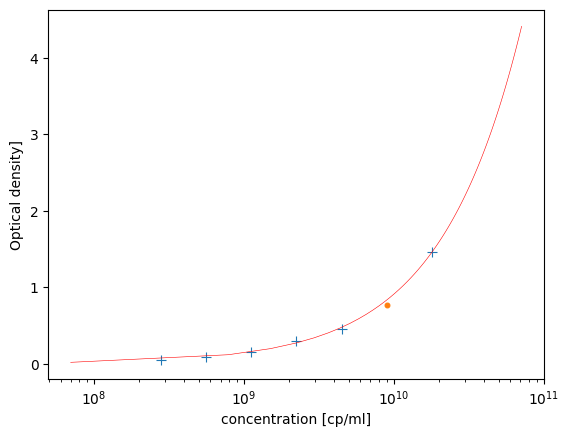

In [272]:
def fit_reference_auto_rm(x, y, err_threshold = 0.998):
    """Fits the reference and removes a point to fing min error

    Parameters
    ----------
    x : array_like
        x-axis values.
    y : array_like
        y-axis value.
    err_threshold : Eroor threshold to to skip point removal

    Returns
    -------
    array
        parameters of the filt
    int
        index of the removed point, -1 if no point is removed
    float64
        error
    """
    fc = fitdata.fit_reference(fitdata.func, x, y)
    bfn = lambda l: fitdata.inv_func(l, *fc[0])
    x_hat = bfn(y)
    r2_max = r2_score(x, x_hat)
    idx = -1
    print('R_squared = {0:.5f} for index={1}  (R-squared is invalid for nonlinear models!)'.format(r2_max, idx))
    if r2_max > err_threshold:
        return fc, idx, r2_max
    
    for i in range(len(x)):
        xd = x.drop([i], axis=0)
        yd = y.drop([i], axis=0)
        try:
            fc_i = fitdata.fit_reference(fitdata.func, xd.to_numpy(), yd.to_numpy())
        except Exception as e:
            print(i, e)
            continue

        bfn = lambda l: fitdata.inv_func(l, *fc_i[0])
        x_hat = bfn(yd)
        r_squared = r2_score(xd, x_hat)
        print('R_squared = {0:.4f} for index={1}  (R-squared is invalid for nonlinear models!)'.format(r_squared, i))
        if r_squared > r2_max:
            r2_max = r_squared
            fc = fc_i
            idx = i

    return fc, idx, r2_max

fit_data_path = './data/fit_1.csv'
df_csv = pd.read_csv(fit_data_path)
fit_auto_tmp = fit_reference_auto_rm(df_csv['Conc'], df_csv['OD'])
# fit_auto_tmp

fit_image(df_csv['Conc'], df_csv['OD'], fit_auto_tmp[0][0], fit_auto_tmp[0][1], None, confidence='student-t', rm_index=[fit_auto_tmp[1]])

## Sample evaluation

In [29]:
display(get_sample(df_all, 's', 1))

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
B 1    2.459  2.4998  0.0408                  s                 1  \
  2   1.4489  1.4888  0.0399                  s                 1   
  3   0.8489  0.8877  0.0388                  s                 1   
  4   0.4732  0.5114  0.0382                  s                 1   

     plate_layout_dil_id  
B 1                    1  
  2                    2  
  3                    3  
  4                    4

Fit the data, and apply the inverse function as a check...

In [32]:
popt, pcov, infodict, mesg, ier = fitdata.fit_reference(fitdata.func, ref['plate_layout_dil'], ref['OD_delta'])  
od1 = fitdata.func(1.0e9, *popt)
inv_od1 = fitdata.inv_func(od1, *popt)
display(inv_od1)

999999999.9999968

In [33]:
samplesk = df_all.loc[(df_all['plate_layout_ident']=='s') | (df_all['plate_layout_ident']=='k') | (df_all['plate_layout_ident']=='r')]
samplesk.loc[:, ['plate_layout_dil']] = samplesk['plate_layout_dil_id'].map(reference_conc['dilution'])
display(samplesk)

def unique_sample_numbers(df):
  sample_nums = df['plate_layout_num'].astype(int).unique()
  sample_nums.sort()
  return sample_nums

sample_nums = unique_sample_numbers(samplesk)
display(sample_nums)

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 1    3.0362  3.0779  0.0417                  k                 1  \
  2    1.9465  1.9868  0.0403                  k                 1   
  3    1.1445  1.1839  0.0394                  k                 1   
  4     0.631  0.6691  0.0381                  k                 1   
  5     3.158  3.2007  0.0427                  r                 1   
...       ...     ...     ...                ...               ...   
H 8    0.0091  0.0462  0.0371                  s                14   
  9     0.008  0.0464  0.0384                  s                21   
  10   0.0081  0.0459  0.0378                  s                21   
  11   0.0094  0.0474   0.038                  s                21   
  12   0.0115  0.0483  0.0368                  s                21   

      plate_layout_dil_id  plate_layout_dil  
A 1                     1               1.0  
  2                     2               2.0  
  3                     3               4.0  
  4                     4               8.0  
  5                     1               1.0  
...                   ...               ...  
H 8                     4               8.0  
  9                     1               1.0  
  10                    2               2.0  
  11                    3               4.0  
  12                    4               8.0  

[95 rows x 7 columns]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

For Coefficient of variation compution we need to use ddof (degrees of freedom) parameter set to `ddof=1`.

In [34]:
from scipy.stats import variation
import numpy

def conc_func(x, dil, *popt):
    return fitdata.inv_func(x, *popt) * dil

# process sample
sample_num = 1
a_sample = get_sample(samplesk, 'k', sample_num)
a_sample.loc[:, ['concentration']] = a_sample.apply(lambda x: conc_func(x['OD_delta'], x['plate_layout_dil'], *popt), axis=1)
display(a_sample)

test_cv = variation(a_sample['concentration'], ddof=1)
test_mean = numpy.mean(a_sample['concentration'])
print("CV %f" % test_cv)
print("mean %f" % test_mean)

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 1   3.0362  3.0779  0.0417                  k                 1  \
  2   1.9465  1.9868  0.0403                  k                 1   
  3   1.1445  1.1839  0.0394                  k                 1   
  4    0.631  0.6691  0.0381                  k                 1   

     plate_layout_dil_id  plate_layout_dil  concentration  
A 1                    1               1.0   1.950731e+10  
  2                    2               2.0   1.966449e+10  
  3                    3               4.0   1.954209e+10  
  4                    4               8.0   1.911846e+10

CV 0.012141
mean 19458088234.454849


### Compute concentration for all `s` and `k` samples

In [35]:
samplesk.loc[:, ['concentration']] = samplesk.apply(lambda x: conc_func(x['OD_delta'], x['plate_layout_dil'], *popt), axis=1)
samplesk

OD_delta  OD_450  OD_630 plate_layout_ident  plate_layout_num   
A 1    3.0362  3.0779  0.0417                  k                 1  \
  2    1.9465  1.9868  0.0403                  k                 1   
  3    1.1445  1.1839  0.0394                  k                 1   
  4     0.631  0.6691  0.0381                  k                 1   
  5     3.158  3.2007  0.0427                  r                 1   
...       ...     ...     ...                ...               ...   
H 8    0.0091  0.0462  0.0371                  s                14   
  9     0.008  0.0464  0.0384                  s                21   
  10   0.0081  0.0459  0.0378                  s                21   
  11   0.0094  0.0474   0.038                  s                21   
  12   0.0115  0.0483  0.0368                  s                21   

      plate_layout_dil_id  plate_layout_dil  concentration  
A 1                     1               1.0   1.950731e+10  
  2                     2               2.0   1.966449e+10  
  3                     3               4.0   1.954209e+10  
  4                     4               8.0   1.911846e+10  
  5                     1               1.0   2.088755e+10  
...                   ...               ...            ...  
H 8                     4               8.0   2.322405e+07  
  9                     1               1.0   2.322311e+05  
  10                    2               2.0   9.131597e+05  
  11                    3               4.0   1.468490e+07  
  12                    4               8.0   7.404123e+07  

[95 rows x 8 columns]

In [36]:
SAMPLE_TYPES = {'s':'sample', 'k':'controll', 'r':'refference', 'b':'blank'}

def process_sample(samples, stype, sample_num):
    sample = get_sample(samples, stype, sample_num)
    cv = variation(sample['concentration'], ddof=1)
    mean = numpy.mean(sample['concentration'])

    return sample, cv, mean


def print_sample(number, stype, sample, cv, mean):
    display(sample[['OD_delta', 'plate_layout_dil', 'concentration']])
    print("{1} '{2}' {0}".format(number, SAMPLE_TYPES[stype], stype))
    print("CV = {:2.3} [%]".format(100 * cv))
    print("mean = {:.4} [cp/ml]".format(mean))


process_sample(samplesk, 'k', 1)
sample_results = pd.DataFrame(columns=['id', 'cv', 'cp_mean'])
for i in sample_nums:
    stype = 's'
    s = process_sample(samplesk, 's', i)
    print_sample(i, 's', *s)
    sample_results.loc[len(sample_results)] = ['sample {:02d}'.format(i), s[1], s[2]]
    if i == 3: break;

display(sample_results)

OD_delta  plate_layout_dil  concentration
B 1    2.459               1.0   1.385974e+10
  2   1.4489               2.0   1.319356e+10
  3   0.8489               4.0   1.356969e+10
  4   0.4732               8.0   1.370928e+10

sample 's' 1
CV = 2.1 [%]
mean = 1.358e+10 [cp/ml]


OD_delta  plate_layout_dil  concentration
C 1    1.795               1.0   8.784057e+09
  2   0.9791               2.0   8.061288e+09
  3   0.5513               4.0   8.172350e+09
  4   0.3096               8.0   8.459048e+09

sample 's' 2
CV = 3.86 [%]
mean = 8.369e+09 [cp/ml]


OD_delta  plate_layout_dil  concentration
D 1   1.1006               1.0   4.653687e+09
  2   0.5858               2.0   4.383735e+09
  3   0.3201               4.0   4.392341e+09
  4   0.1726               8.0   4.366028e+09

sample 's' 3
CV = 3.08 [%]
mean = 4.449e+09 [cp/ml]


,id,cv,cp_mean
0,sample 01,0.021012,1.358306e+10
1,sample 02,0.038640,8.369186e+09
2,sample 03,0.030778,4.448948e+09


In [37]:
sample_results = pd.DataFrame(columns=['id', 'CV [%]', 'Reader Data [cp/ml]'])
knum = 1
s = process_sample(samplesk, 'k', knum)
sample_results.loc[len(sample_results)] = ['control {:02d}'.format(knum), s[1], s[2]]

rnum = 1
s = process_sample(samplesk, 'r', rnum)
sample_results.loc[len(sample_results)] = ['reference {:02d}'.format(knum), s[1], s[2]]

for i in sample_nums:
    stype = 's'
    s = process_sample(samplesk, 's', i)
    sample_results.loc[len(sample_results)] = ['sample {:02d}'.format(i), s[1], s[2]]

sample_results.set_index(sample_results['id'], inplace=True)
sample_results = sample_results.drop('id', axis=1)
sl = sample_results
display(sl)

,CV [%],Reader Data [cp/ml]
id,,
control 01,0.012141,1.945809e+10
reference 01,0.012564,2.088304e+10
sample 01,0.021012,1.358306e+10
sample 02,0.038640,8.369186e+09
sample 03,0.030778,4.448948e+09
sample 04,0.072374,2.672252e+08
sample 05,0.065429,3.333131e+09
sample 06,0.030231,2.685534e+09
sample 07,0.046355,2.814925e+09


## Worklist

In [42]:
tmp = ['SampleID_', 'Dilution_', 'Viscosity_']
tnum = 1
a = [x + str(tnum) for x in tmp]
a

['SampleID_1', 'Dilution_1', 'Viscosity_1']

In [60]:
def worklist_sample(worklist_file, sample_id):
    wl = pd.read_excel(worklist_file)
    wl.set_index([['control 01', 'reference 01', 'blank', 'sample 01', 'sample 02', 'sample 03',
        'sample 04', 'sample 05', 'sample 06', 'sample 07', 'sample 08', 'sample 09', 'sample 10',
        'sample 11', 'sample 12', 'sample 13', 'sample 14', 'sample 15', 'sample 16', 'sample 17',
        'sample 18', 'sample 19', 'sample 20', 'sample 21']], inplace=True)
    wl.drop('blank', axis=0, inplace=True)
    wl.index.name = 'Sample type'
    cols =['SampleID_', 'Dilution_', 'Viscosity_']
    cols = [x + str(sample_id) for x in cols]

    invalid_sample = wl['SampleID_{}'.format(sample_id)].isnull().values.any()
    if invalid_sample:
        return None
    
    return wl[cols]

SAMPLE_ID = 1
worklist_sample(WORKLIST_FILE_PATH, SAMPLE_ID)

,SampleID_1,Dilution_1,Viscosity_1
Sample type,,,
control 01,Kontrolle01,1,False
reference 01,Referenz01,1,False
sample 01,EHU04_2311_AAV9_FT1,10,False
sample 02,EHU04_2311_AAV9_FT2,10,False
sample 03,EHU04_2311_AAV9_FT3,10,False
sample 04,EHU04_2311_AAV9_W1,10,False
sample 05,EHU04_2311_AAV9_E2,1000,False
sample 06,EHU04_2311_AAV9_E1+E3,50,False
sample 07,EHU04_2311_AAV9_E_DIL,1000,False


In [26]:
print('Worklist file `{}`'.format(WORKLIST_FILE_PATH))
wl = pd.read_excel(WORKLIST_FILE_PATH)
wl.set_index([['control 01', 'reference 01', 'blank', 'sample 01', 'sample 02', 'sample 03', 'sample 04', 'sample 05', 'sample 06', 'sample 07', 'sample 08', 'sample 09', 'sample 10', 'sample 11', 'sample 12', 'sample 13', 'sample 14', 'sample 15', 'sample 16', 'sample 17', 'sample 18', 'sample 19', 'sample 20', 'sample 21']], inplace=True)
wl.drop('blank', axis=0, inplace=True)
wl.index.name = 'Sample type'
# display(wl)

wl_1 = wl[['SampleID_1', 'Dilution_1', 'Viscosity_1']]
wl_2 = wl[['SampleID_2', 'Dilution_2', 'Viscosity_2']]

display(wl)
display(wl_1)

Worklist file `./data/input/230426_GN004240-033_-_worklist-ELISA.xls`


,SampleID_1,Dilution_1,Viscosity_1,SampleID_2,Dilution_2,Viscosity_2,SampleID_3,Dilution_3,Viscosity_3,SampleID_4,Dilution_4,Viscosity_4
Sample type,,,,,,,,,,,,
control 01,Kontrolle01,1,False,Kontrolle01,1,False,NaN,NaN,NaN,NaN,NaN,NaN
reference 01,Referenz01,1,False,Referenz01,1,False,NaN,NaN,NaN,NaN,NaN,NaN
sample 01,EHU04_2311_AAV9_FT1,10,False,PPO02_2307HAR_MEG_Z2,100,False,NaN,NaN,NaN,NaN,NaN,NaN
sample 02,EHU04_2311_AAV9_FT2,10,False,PPO02_2307HAR_MEG_Z3,100,False,NaN,NaN,NaN,NaN,NaN,NaN
sample 03,EHU04_2311_AAV9_FT3,10,False,PPO02_2307HAR_MEG_Z4,100,False,NaN,NaN,NaN,NaN,NaN,NaN
sample 04,EHU04_2311_AAV9_W1,10,False,PPO02_2307HAR_ECV_P,50,False,NaN,NaN,NaN,NaN,NaN,NaN
sample 05,EHU04_2311_AAV9_E2,1000,False,PPO02_2307_UFA_UF1_R,500,False,NaN,NaN,NaN,NaN,NaN,NaN
sample 06,EHU04_2311_AAV9_E1+E3,50,False,PPO02_2307_UFA_Pool,1000,False,NaN,NaN,NaN,NaN,NaN,NaN
sample 07,EHU04_2311_AAV9_E_DIL,1000,False,PPO02_2307_UCE_P,500,True,NaN,NaN,NaN,NaN,NaN,NaN


,SampleID_1,Dilution_1,Viscosity_1
Sample type,,,
control 01,Kontrolle01,1,False
reference 01,Referenz01,1,False
sample 01,EHU04_2311_AAV9_FT1,10,False
sample 02,EHU04_2311_AAV9_FT2,10,False
sample 03,EHU04_2311_AAV9_FT3,10,False
sample 04,EHU04_2311_AAV9_W1,10,False
sample 05,EHU04_2311_AAV9_E2,1000,False
sample 06,EHU04_2311_AAV9_E1+E3,50,False
sample 07,EHU04_2311_AAV9_E_DIL,1000,False


In [95]:
final = pd.concat([wl_1, sl], axis=1)
final.loc[:, ['Result [cp/ml]']] = final.apply(lambda x: x['Reader Data [cp/ml]'] * x['Dilution_1'], axis=1)
final.loc[:, ['CV [%]']] = final.apply(lambda x: x['CV [%]'] * 100, axis=1)
# reorder columns
final = final.reindex(['SampleID_1', 'Dilution_1', 'Viscosity_1', 'Reader Data [cp/ml]', 'Result [cp/ml]', 'CV [%]'], axis=1)
final.rename(columns={'SampleID_1': 'Sample Name', 'Dilution_1': 'Pre-dilution'}, inplace=True)
final.drop('Viscosity_1', axis=1, inplace=True)
final.index.name = 'Sample type'
final


,Sample Name,Pre-dilution,Reader Data [cp/ml],Result [cp/ml],CV [%]
Sample type,,,,,
control 01,Kontrolle01,1,1.945809e+10,1.945809e+10,1.214118
reference 01,Referenz01,1,2.088304e+10,2.088304e+10,1.256417
sample 01,EHU04_2311_AAV9_FT1,10,1.358306e+10,1.358306e+11,2.101188
sample 02,EHU04_2311_AAV9_FT2,10,8.369186e+09,8.369186e+10,3.864029
sample 03,EHU04_2311_AAV9_FT3,10,4.448948e+09,4.448948e+10,3.077839
sample 04,EHU04_2311_AAV9_W1,10,2.672252e+08,2.672252e+09,7.237445
sample 05,EHU04_2311_AAV9_E2,1000,3.333131e+09,3.333131e+12,6.542862
sample 06,EHU04_2311_AAV9_E1+E3,50,2.685534e+09,1.342767e+11,3.023146
sample 07,EHU04_2311_AAV9_E_DIL,1000,2.814925e+09,2.814925e+12,4.635536


## Plate Layout

In [40]:
df = plate_layout_num.replace({'b':-99}).astype(float)
df

,1,2,3,4,5,6,7,8,9,10,11,12
A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
B,1.0,1.0,1.0,1.0,8.0,8.0,8.0,8.0,15.0,15.0,15.0,15.0
C,2.0,2.0,2.0,2.0,9.0,9.0,9.0,9.0,16.0,16.0,16.0,16.0
D,3.0,3.0,3.0,3.0,10.0,10.0,10.0,10.0,17.0,17.0,17.0,17.0
E,4.0,4.0,4.0,4.0,11.0,11.0,11.0,11.0,18.0,18.0,18.0,18.0
F,5.0,5.0,5.0,5.0,12.0,12.0,12.0,12.0,19.0,19.0,19.0,19.0
G,6.0,6.0,6.0,6.0,13.0,13.0,13.0,13.0,20.0,20.0,20.0,20.0
H,7.0,7.0,7.0,7.0,14.0,14.0,14.0,14.0,21.0,21.0,21.0,21.0


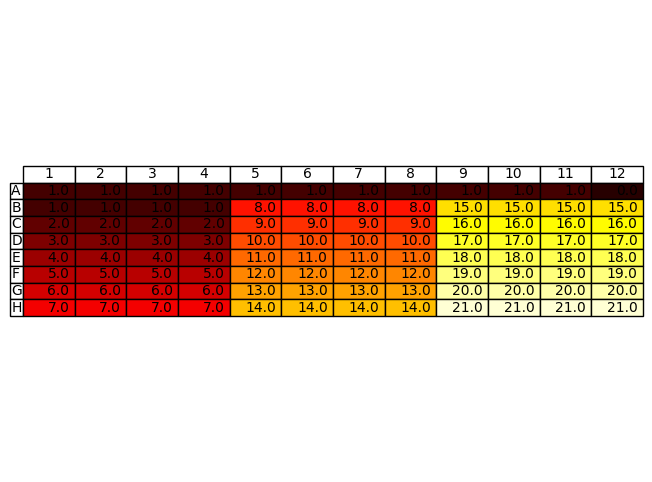

In [41]:
from matplotlib import pyplot as plt

vals = np.around(df.values, 2)
norm = plt.Normalize(vals.min()-1, vals.max()+1)
colours = plt.cm.hot(norm(vals))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns,
                    loc='center', cellColours=colours)
plt.show()

## Report  
We build a report here...

### Sample

In [79]:
def sample_to_md(number, stype, sample, cv, mean):
    s_view = sample[['OD_delta', 'plate_layout_dil', 'concentration']]
    md = "### Sample: {0} '{1}' {2}\n\n".format(SAMPLE_TYPES[stype], stype, number)
    md += s_view.to_markdown()
    md += '\n\n'
    md += "CV = {:2.3} [%]  \n".format(100 * cv)
    md += "mean = {:.4} [cp/ml]\n\n".format(mean)

    return md

def sample_section_md(samples):
    md = '## Sample evaluation\n\n' 
    k = process_sample(samples, 'k', 1)
    md += sample_to_md(1, 'k', *k)
    for i in sample_nums:
        stype = 's'
        s = process_sample(samples, 's', i)
        md += sample_to_md(i, 's', *s)
    return md

def save_md(file_path, md_txt):
    try:
        with open(file_path, 'w') as fl:
            fl.write(md_txt)
    except Exception as e:
        print('Error: ' + str(e))

### Reference Curve Fit

R_squared = 0.99997 for index=-1  (R-squared is invalid for nonlinear models!)
parameter [7.88768623e-03 9.41941858e-01 3.28000461e+10 7.97675039e+00]
chisq=5.896e+09; error=[1.88997075e-02 3.85487142e-02 5.89602516e+09 7.66813387e-01]
function calls 133
a: 0.00789 [-0.0523, 0.068]; err=0.0601[762.55%]
b: 0.942 [0.819, 1.06]; err=0.123[13.02%]
c: 3.28e+10 [1.4e+10, 5.16e+10]; err=1.88e+10[57.21%]
d: 7.98 [5.54, 10.4]; err=2.44[30.59%]
student-t is used for error estimation using 3 degrees of freedom


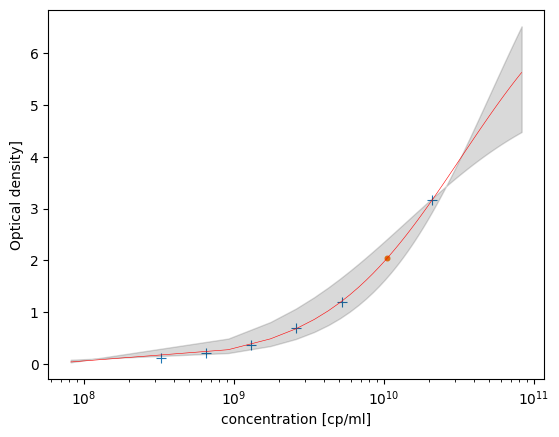

'## Reference Curve Fit\n\n$\\LARGE x = {d + {a - d \\over {1 + ({ x \\over c })^b}} }$  \n\n!["alt text"](./result/fit.png)\n\nFit parameters\n\n| Parameter name   |   Estimated value |       Error | Confidence interval   |\n|:-----------------|------------------:|------------:|:----------------------|\n| a                |        0.00788769 | 0.0188997   | [-0.0523, 0.068]      |\n| b                |        0.941942   | 0.0385487   | [0.819, 1.06]         |\n| c                |        3.28e+10   | 5.89603e+09 | [1.4e+10, 5.16e+10]   |\n| d                |        7.97675    | 0.766813    | [5.54, 10.4]          |\n\nBackfit...\n\n| Well      |   Standard Value [cp/ml] |   Concentration backfit [cp/ml] |   Optical density |\n|:----------|-------------------------:|--------------------------------:|------------------:|\n| (\'A\', 5)  |              2.09e+10    |                     2.08875e+10 |            3.158  |\n| (\'A\', 6)  |              1.045e+10   |                     1.049

In [274]:
def fit_section_md(df_backfit, x, y):
    md = '## Reference Curve Fit\n\n'
    md += '$\LARGE x = {d + {a - d \over {1 + ({ x \over c })^b}} }$  \n\n'
    md += '!["alt text"](./result/fit.png)'
    df_fit = fit_sheet(popt, pcov)
    md += '\n\nFit parameters\n\n'
    md += df_fit.to_markdown(index=False) + '\n\n'
    md += 'Backfit...'
    md += '\n\n' + df_backfit.to_markdown() + '\n\n'

    return md

# x = ref['plate_layout_dil']
# y = ref['OD_delta']     
# popt, pcov, infodict, mesg, ier = fitdata.fit_reference(fitdata.func, x, y)

x = ref.reset_index(level=[0,1])['plate_layout_dil']
y = ref.reset_index(level=[0,1])['OD_delta']
fit_result = fit_reference_auto_rm(x, y)
result_img = './result/fit.png'
fit_image(x, y, fit_result[0][0], fit_result[0][1], result_img, confidence='student-t', rm_index=[fit_auto_tmp[1]])
bf = backfit(ref, fit_result[0][0])

fit_section_md(bf, x, y)

### Results

In [275]:
def result_section(df):
    md = '## Analysis Results\n\n'

    md += df.to_markdown()
    md += '\n\n'
    
    return md


### Header

In [276]:
def header_section(date, id, msg):
    md =  '## Header\n\n'

    md += 'Date: {}\n\n'.format(date)
    md += 'Ientification: {}\n\n'.format(id)
    md += 'Comment: {}\n\n'.format(msg)

    return md;

### Report Assembly

In [277]:
report = '''
# Automatically Generated Markdown report

This a PoC for automatic report generation...  

'''

report += header_section('231705', 'GN004240-033', 'TODO...')
report += result_section(final)
report += fit_section_md(bf, x, y)
report += sample_section_md(samplesk)

save_md('./result/report.md', report)

NameError: name 'final' is not defined

### Export to PDF

In [48]:
from md2pdf.core import md2pdf
PDF_FILE_PATH = "./result/my.pdf"

In [ ]:
md2pdf(PDF_FILE_PATH,
       md_content=report,
       md_file_path=None,
       css_file_path=None,
       base_url=None)